# Star Hotels Quiz
## Context

A significant number of hotel bookings are called off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
1. Loss of resources (revenue) when the hotel cannot resell the room.
2. Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
3. Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
4. Human resources to make arrangements for the guests.

## Objective

The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. Star Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.


## Data Description

The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by Star Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

### Importing Libraries

In [1]:
# for data manipulation
import numpy as np
import pandas as pd

# for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# for data splitting
from sklearn.model_selection import train_test_split

# for metrics 
from sklearn import metrics

# for model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.stats.api as sms
import statsmodels.api as sm

# for model tuning
from sklearn.model_selection import GridSearchCV

# for warnings
import warnings
warnings.filterwarnings('ignore')

### Importing the Dataset

In [2]:
df = pd.read_csv('StarHotelsGroup.csv')
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,3,0,0,3,Not Selected,0,Room_Type 1,277,2019,7,13,Online,0,0,0,89.10,2,Canceled


In [3]:
df.shape

(56926, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56926 entries, 0 to 56925
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          56926 non-null  int64  
 1   no_of_children                        56926 non-null  int64  
 2   no_of_weekend_nights                  56926 non-null  int64  
 3   no_of_week_nights                     56926 non-null  int64  
 4   type_of_meal_plan                     56926 non-null  object 
 5   required_car_parking_space            56926 non-null  int64  
 6   room_type_reserved                    56926 non-null  object 
 7   lead_time                             56926 non-null  int64  
 8   arrival_year                          56926 non-null  int64  
 9   arrival_month                         56926 non-null  int64  
 10  arrival_date                          56926 non-null  int64  
 11  market_segment_

* `type_of_meal_plan`, `room_type_reserved`, `market_segment_type`, and `booking_status` are of object type while rest columns are numeric in nature.

* There are no null values in the dataset.

In [5]:
# checking for duplicated values
df.duplicated().sum()

14350

- There are 14350 duplicate values in the data. 
- Let's drop these values.

In [6]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

### Exploratory Data Analysis

### Check summary Statistics and analyze the variables. Also find the  Difference between the 25th quantile and 50% quantile value of average-price_per_room

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,42576.0,1.916737,0.527524,0.0,2.0,2.0,2.0,4.0
no_of_children,42576.0,0.142146,0.459920,0.0,0.0,0.0,0.0,10.0
no_of_weekend_nights,42576.0,0.895270,0.887864,0.0,0.0,1.0,2.0,8.0
no_of_week_nights,42576.0,2.321167,1.519328,0.0,1.0,2.0,3.0,17.0
required_car_parking_space,42576.0,0.034362,0.182160,0.0,0.0,0.0,0.0,1.0
lead_time,42576.0,77.315953,77.279616,0.0,16.0,53.0,118.0,521.0
arrival_year,42576.0,2018.297891,0.626126,2017.0,2018.0,2018.0,2019.0,2019.0
arrival_month,42576.0,6.365488,3.051924,1.0,4.0,6.0,9.0,12.0
arrival_date,42576.0,15.682873,8.813991,1.0,8.0,16.0,23.0,31.0
repeated_guest,42576.0,0.030886,0.173011,0.0,0.0,0.0,0.0,1.0


**Observations:**
* The number of adults ranges from 0 to 4, which is usual.
* The maximum value in the number of children column is 10, which is a bit unusual and might require a check.
* The range of the number of weeks and weekend nights seems fine. Though 8 weekends might be a very long stay.
* At least 75% of the customers do not require car parking space.
* On average the customers are book 77 days in advance. There's also a very huge difference in 75th percentile and maximum value which indicates there might be outliers present in this column.

**Answer:**
* The difference between the 25th and 50% quantile of avg_price_per_romm = 21.5

### Univariate Analysis

In [8]:
# numerical columns 
df_numerical = df.drop(['type_of_meal_plan','room_type_reserved','market_segment_type','booking_status'],axis=1)
# categorical columns
df_categorical = df[['type_of_meal_plan','room_type_reserved','market_segment_type','booking_status']]

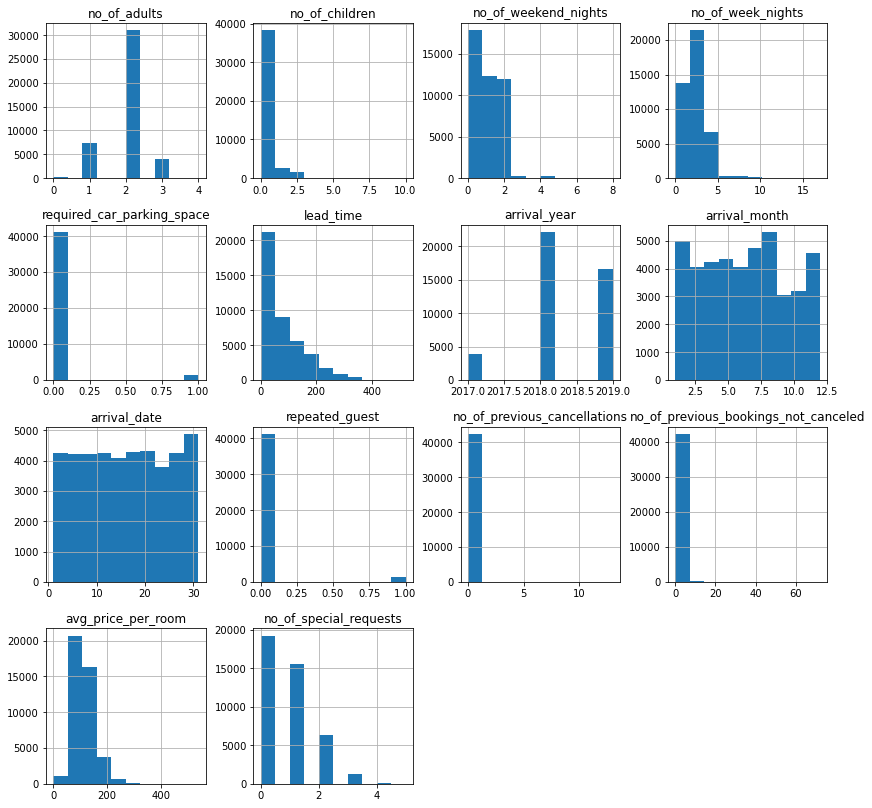

In [9]:
df_numerical.hist(figsize=(14,14))
plt.show()

* Most of the bookings were made for 2 adults.Almost 90% of the customers didn't make reservations for children.
* No of weekend night spent is distributed mostly across values 0 , 1 and 2, with 0 being the highest.So many of the customers of the customers do not plan to spend the weekend in the hotel.
* Most of the bookings are made for between 1 to 3 nights.A very less proportion of customers made the booking for more than 15 days.
* Most of the customers(above 90%) do not require a car parking space.
* The distribution of lead time is right-skewed, and there are many outliers.Some customers made booking 500 days in     advance.Many customers have made the booking on the same day of arrival as well.
*  August is the busiest month for the hotel followed by July.A significant amount of the bookings were made in August.
* Very few customers have more than one cancellation.Some customers canceled more than 12 times.
* Very few customers have more than 1 booking not canceled previously.Some customers have not canceled their bookings 70 times.
* The distribution of average price per room is skewed to right. There are outliers on both sides.The average price of a room is around ~100 euros.


### Univariate Analysis for Categorical Variables

### More than 90% of the type of room reserved by the customer are of which room type?

In [10]:
for i in df_categorical.columns.tolist():
    print(df_categorical[i].value_counts())
    print('-'*40)

Meal Plan 1     31863
Not Selected     8716
Meal Plan 2      1989
Meal Plan 3         8
Name: type_of_meal_plan, dtype: int64
----------------------------------------
Room_Type 1    29730
Room_Type 4     9369
Room_Type 6     1540
Room_Type 5      906
Room_Type 2      718
Room_Type 7      307
Room_Type 3        6
Name: room_type_reserved, dtype: int64
----------------------------------------
Online           34169
Offline           5777
Corporate         1939
Complementary      496
Aviation           195
Name: market_segment_type, dtype: int64
----------------------------------------
Not_Canceled    28089
Canceled        14487
Name: booking_status, dtype: int64
----------------------------------------


* Most of the customers prefer meal plan 1 that is only breakfast.20.5% of the customers didn't select a meal plan.
* 80% of the hotel booking were made online followed by 13.6% of the booking made offline.So, it's clear that people are more likely to book online.

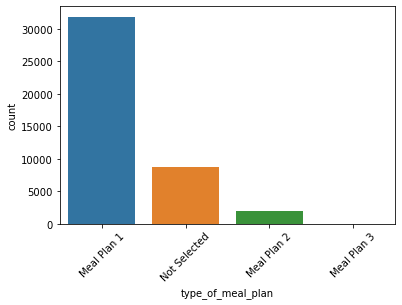

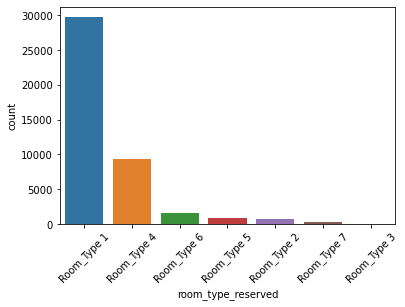

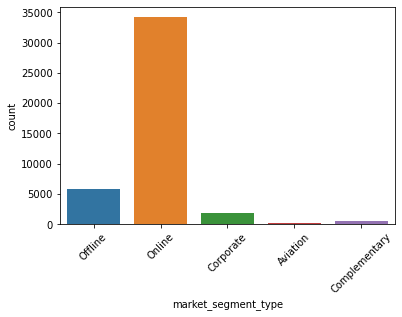

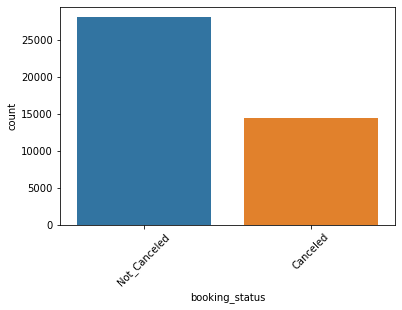

In [11]:
for i in df_categorical.columns.tolist():
    sns.countplot(i, data=df_categorical)
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=45)
    plt.show()

### Bivariate and Multivariate analysis

**We have analyzed different categorical and numerical variables.** 

**Let's now check how does cancellation rate is related with other categorical variables**

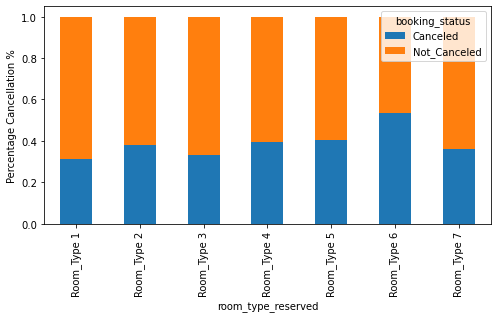

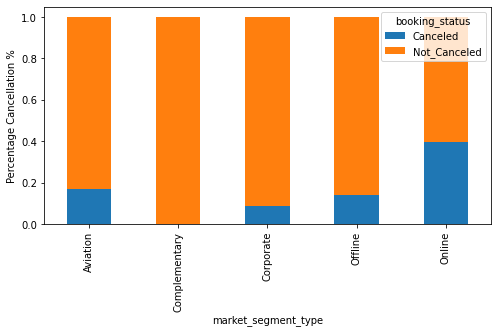

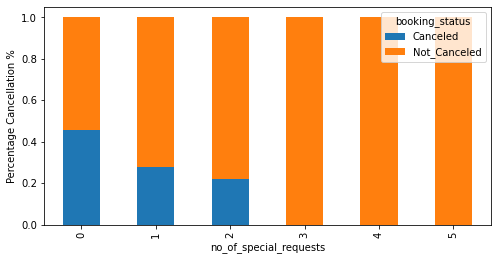

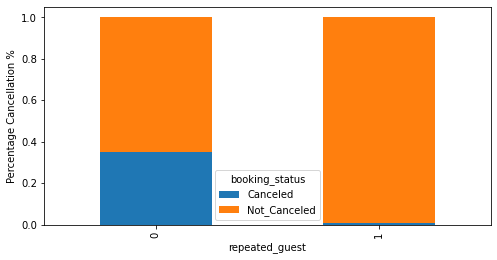

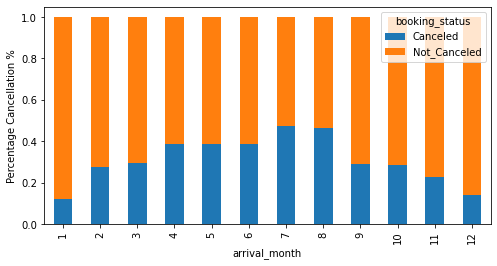

In [12]:
new_cols = df[['room_type_reserved','market_segment_type','booking_status','no_of_special_requests','repeated_guest','arrival_month']]

for i in new_cols:
    if i != 'booking_status':
        pd.crosstab(df[i],df['booking_status'],normalize='index').plot(kind='bar',figsize=(8,4),stacked=True)
        plt.ylabel('Percentage Cancellation %')
        plt.show()

* The cancelation of booking doesn't have any significance relation with a specific room type.The number of cancellations almost equaly distributed across all room types.
* Around 40% of the online booking were canceled.Bookings made offline are less prone to cancellations.Corporate and Complementary segment shows least cancellations.
* If a customer has made more than 2 requests there's a very high chance that the booking will not be canceled.
* Cancellation of bookings are lowest in Januaray and December, while it's highest for July and August. July and August also has the most number of bookings.
* There are very few repeat customers but the cancellation among them is very less.
  This is a good indication as repeat customers are important for the hospitality industry as they can help in spreading     
  the word of mouth.A loyal guest is usually more profitable for the business because they are more familiar with what is on   
  offer at a hotel they have visited before.Attracting new customers is tedious and costs more as compared to a repeated guest.

**Let's encode Canceled bookings to 1 and Not_Canceled as 0 for further analysis**

In [13]:
df['booking_status'] = df['booking_status'].apply(lambda x: 1 if x=='Canceled' else 0)
df['booking_status'].head()

0    0
1    0
2    1
3    1
4    1
Name: booking_status, dtype: int64

### Find correlation between different variables

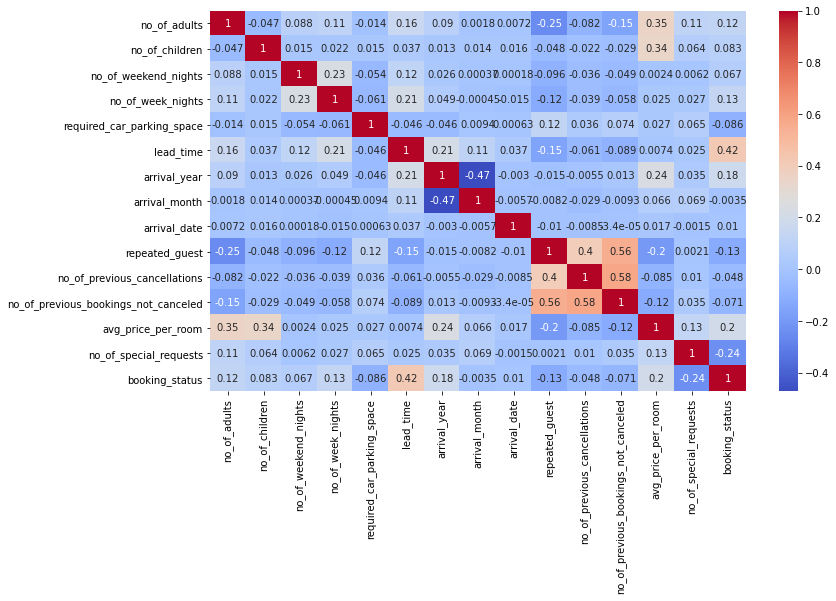

In [14]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

* There's a positive correlation between the number of customers (adults and children) and the average price per room.
    * This makes sense as more the number of customers more rooms they will require thus increasing the cost.
* There's a negative correlation between average room price by a customer and repeated guests. The hotel might be giving some loyalty benefits to the customers.
* There's a positive correlation between the number of previous bookings canceled and previous bookings not canceled by a customer and repeated guest. 
* There's a positive correlation between lead time and the number of weeknights a customer is planning to stay in the hotel.
* There's a positive correlation between booking status and lead time, indicating higher the lead time higher are the chances of cancellation. We will analyze it further.
* There's a negative correlation between the number of special requests from the customer and the booking status, indicating if a customer has made some special requests the chances of cancellation might decrease. We will analyze it further.

**Generally people travel with their spouse and children for vacations or other activities. Let's create a new dataframe of the customers who traveled with their families and analyze the impact on booking status.**

In [15]:
df_family = df[(df['no_of_children'] >= 1) & (df['no_of_adults'] > 1)]
df_family.shape

(3857, 18)

In [16]:
df_family['family_size'] = df_family['no_of_children'] + df_family['no_of_adults']
df_family['family_size'].head()

42     3
45     4
50     3
94     4
120    4
Name: family_size, dtype: int64

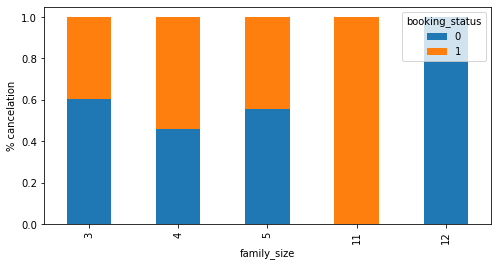

In [17]:
pd.crosstab(df_family['family_size'], df_family['booking_status'], normalize='index').plot(kind='bar',figsize=(8,4),stacked=True)
plt.ylabel('% cancelation')
plt.show()

* We can see that as the size of the family increases the chances of cancellation also increases.
* There's a ~50% chance of a booking getting canceled if the booking is made for 4 family members.

**Let's do a similar analysis for the customer who stay for at least a day at the hotel.**

In [18]:
df_stay = df[(df.no_of_week_nights > 0) & (df.no_of_weekend_nights > 0)]
df_stay.shape

(22049, 18)

In [19]:
df_stay['Total_days'] = df_stay.no_of_week_nights + df_stay.no_of_weekend_nights
df_stay['Total_days'].head()

0    3
1    5
2    3
5    2
8    4
Name: Total_days, dtype: int64

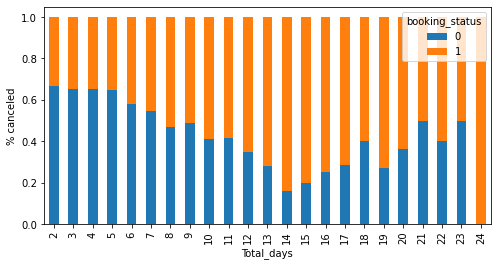

In [20]:
pd.crosstab(df_stay.Total_days, df_stay.booking_status, normalize='index').plot(kind='bar',figsize=(8,4),stacked=True)
plt.ylabel('% canceled')
plt.show()

* The chances of cancellation increase as the number of days the customer planned to stay at the hotel increases.
* The chances of cancellation increase further if the stay is planned for more than 5 days.

**Let's find out what are the busiest months in the hotel.**

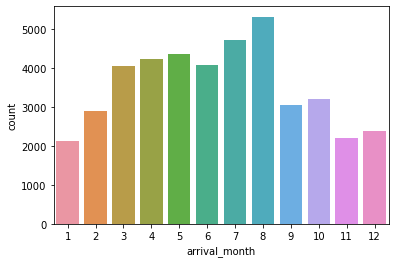

In [21]:
sns.countplot(x=df.arrival_month)
plt.show()

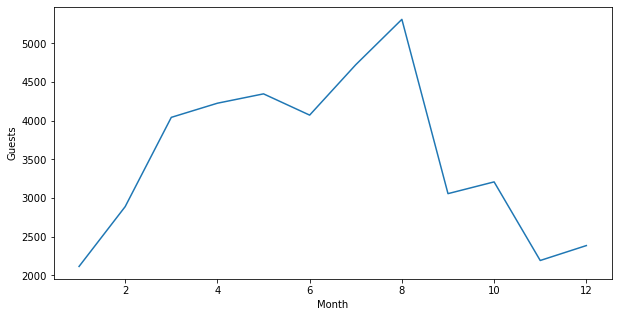

In [22]:
# grouping the data on arrival months and extracting the count of bookings
df_month = df.groupby(['arrival_month'])['booking_status'].count()

# creating a dataframe with months and count of customers in each month
df_month = pd.DataFrame({'Month':list(df_month.index), 'Guests':list(df_month.values)})

# plotting the trend over different months
plt.figure(figsize=(10,5))
sns.lineplot(x='Month', y='Guests', data=df_month)
plt.show()

* The trend shows the number of bookings remains consistent from March to June and the hotel sees around 4000 to 4500 guests.
* Most bookings were made in July and August- more than 5000 bookings. 
* Least bookings were made in January and November - around 2000 bookings.

**As hotel room prices are dynamic, Let's see how the prices vary across different months**

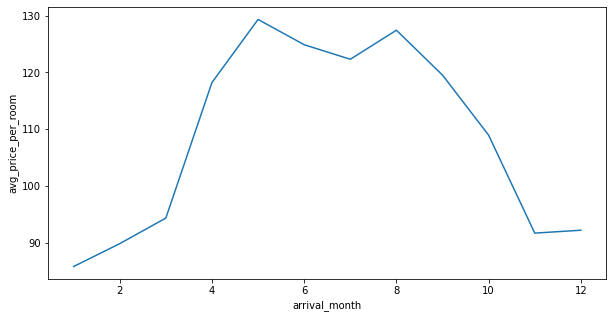

In [24]:
plt.figure(figsize=(10,5))
sns.lineplot(y='avg_price_per_room', x='arrival_month', data=df, ci=None)
plt.show()

* The price of rooms is highest in May to August - vary from 120-130 euros per room.

### Data Preparation for modeling

- We want to predict which bookings will be canceled.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [25]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,0
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,0
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,1
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,1
4,3,0,0,3,Not Selected,0,Room_Type 1,277,2019,7,13,Online,0,0,0,89.10,2,1


In [29]:
x = df.drop(['booking_status'], axis=1)
y = df['booking_status']
x = pd.get_dummies(x, drop_first=True)

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
print('train:',x_train.shape)
print('test:',x_test.shape)

train: (29803, 27)
test: (12773, 27)


### Model evaluation criterion

### Model can make wrong predictions as:

1. Predicting a customer will not cancel their booking but in reality, the customer will cancel their booking.
2. Predicting a customer will cancel their booking but in reality, the customer will not cancel their booking. 

### Which case is more important? 
* Both the cases are important as:

* If we predict that a booking will not be canceled and the booking gets canceled then the hotel will lose resources and will have to bear additional costs of distribution channels.

* If we predict that a booking will get canceled and the booking doesn't get canceled the hotel might not be able to provide satisfactory services to the customer by assuming that this booking will be canceled. This might damage the brand equity. 



### How to reduce the losses?

* Hotel would want `F1 Score` to be maximized, greater the F1  score higher are the chances of minimizing False Negatives and False Positives. 

In [32]:
# function to show a complete metrics report
def classification_report(actual, predicted):
    print(metrics.classification_report(actual, predicted))
    cm = metrics.confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=['Not Canceled','Canceled'], yticklabels=['Not Canceled','Canceled'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

### Logistic Regression (with Sklearn library)

### Build the logistic regression model use random_state =1 and check its performance on train and test dataset

              precision    recall  f1-score   support

           0       0.80      0.89      0.84      8387
           1       0.73      0.59      0.65      4386

    accuracy                           0.78     12773
   macro avg       0.77      0.74      0.75     12773
weighted avg       0.78      0.78      0.78     12773



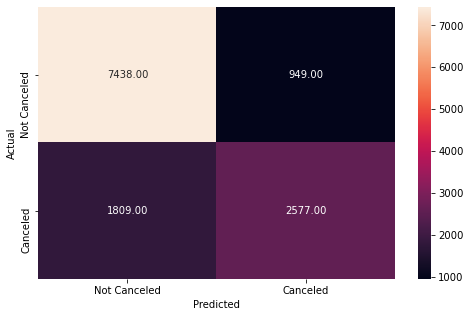

In [33]:
# create model obj
lrmodel = LogisticRegression()
# training model
lrmodel.fit(x_train, y_train)
# using model to predict y_test
yhat = lrmodel.predict(x_test)
# model performance
classification_report(y_test, yhat)

**Checking model performance on training data to check overfitting**

              precision    recall  f1-score   support

           0       0.81      0.89      0.85     19702
           1       0.73      0.59      0.65     10101

    accuracy                           0.79     29803
   macro avg       0.77      0.74      0.75     29803
weighted avg       0.78      0.79      0.78     29803



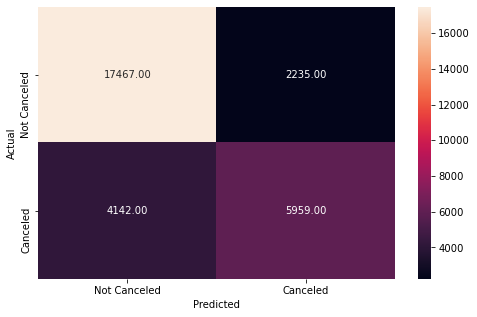

In [34]:
yhat_train = lrmodel.predict(x_train)
classification_report(y_train, yhat_train)

**Observations**

- F1 score on the training and test set is very close, which indicates our model is not overfitting and the model is a good fit.

### Logistic Regression (with statsmodels library)

In [35]:
x = df.drop(['booking_status'], axis=1)
y = df.booking_status

# adding constant
x = sm.add_constant(x)
x = pd.get_dummies(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [36]:
logit = sm.Logit(y_train, x_train.astype(float))
lg2 = logit.fit(disp=False)
lg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         booking_status   No. Observations:                29803
Model:                          Logit   Df Residuals:                    29775
Method:                           MLE   Df Model:                           27
Date:                Thu, 10 Feb 2022   Pseudo R-squ.:                  0.3293
Time:                        17:59:03   Log-Likelihood:                -12799.
converged:                      False   LL-Null:                       -19083.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   55.2735        nan        nan        nan         nan         nan
no_of_adults                            -0.0320      0.035     -0.904      0.366      -0.102       0.037
no_of_children                           0.1129      0.048      2.375      0.018       0.020       0.206
no_of_weekend_nights                     0.0337      0.018      1.874      0.061      -0.002       0.069
no_of_week_nights                        0.0732      0.011      6.885      0.000       0.052       0.094
required_car_parking_space              -1.5124      0.116    -13.007      0.000      -1.740      -1.285
lead_time                                0.0168      0.000     62.116      0.000       0.016       0.017
arrival_year                            -0.0468      0.034     -1.373      0.170      -0.114       0.020
arrival_month                           -0.0416      0.007     -6.146      0.000      -0.055      -0.028
arrival_date                            -0.0029      0.002     -1.650      0.099      -0.006       0.001
repeated_guest                          -3.0309      0.594     -5.099      0.000      -4.196      -1.866
no_of_previous_cancellations             0.2225      0.096      2.307      0.021       0.033       0.412
no_of_previous_bookings_not_canceled    -0.0098      0.053     -0.186      0.852      -0.113       0.093
avg_price_per_room                       0.0168      0.001     25.746      0.000       0.015       0.018
no_of_special_requests                  -1.2915      0.024    -54.838      0.000      -1.338      -1.245
type_of_meal_plan_Meal Plan 1           12.6621        nan        nan        nan         nan         nan
type_of_meal_plan_Meal Plan 2           12.5041        nan        nan        nan         nan         nan
type_of_meal_plan_Meal Plan 3           15.3477        nan        nan        nan         nan         nan
type_of_meal_plan_Not Selected          13.0233        nan        nan        nan         nan         nan
room_type_reserved_Room_Type 1           8.0614        nan        nan        nan         nan         nan
room_type_reserved_Room_Type 2           7.8764        nan        nan        nan         nan         nan
room_type_reserved_Room_Type 3           8.4239        nan        nan        nan         nan         nan
room_type_reserved_Room_Type 4           7.9344        nan        nan        nan         nan         nan
room_type_reserved_Room_Type 5           7.7892        nan        nan        nan         nan         nan
room_type_reserved_Room_Type 6           7.5534        nan        nan        nan         nan         nan
room_type_reserved_Room_Type 7           7.3317        nan        nan        nan         nan         nan
market_segment_type_Aviation            15.4643    1.4e+06    1.1e-05      1.000   -2.75e+06    2.75e+06
market_segment_type_Complementary       -4.8077    1.4e+06  -3.43e-06      1.000   -2.75e+0

Training Performance:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85     19702
           1       0.73      0.61      0.67     10101

    accuracy                           0.79     29803
   macro avg       0.77      0.75      0.76     29803
weighted avg       0.79      0.79      0.79     29803



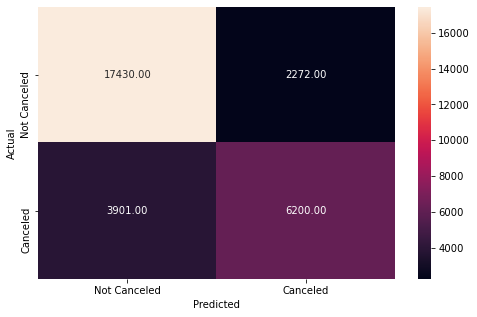

In [37]:
# checking which probabilities are greater than threshold(default threshold = 0.5)
pred_temp = lg2.predict(x_train) > 0.5
# rounding off the above values to get classes
pred = np.round(pred_temp)
print('Training Performance:')
classification_report(y_train, pred)

Test Performance:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85      8387
           1       0.74      0.61      0.67      4386

    accuracy                           0.79     12773
   macro avg       0.77      0.75      0.76     12773
weighted avg       0.79      0.79      0.79     12773



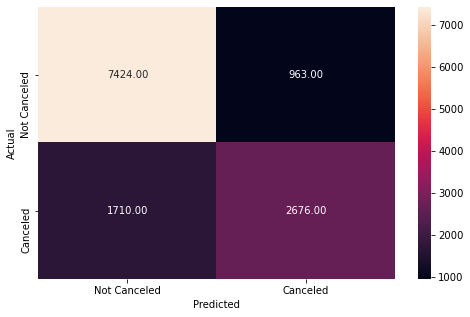

In [38]:
pred_temp_test = lg2.predict(x_test) > 0.5
# rounding off the above values to get classes
pred_test = np.round(pred_temp_test)
print('Test Performance:')
classification_report(y_test, pred_test)

**Observations**

- Negative values of the coefficient show that the probability of customers canceling the booking decreases with the increase of the corresponding attribute value.

- Positive values of the coefficient show that the probability of customer canceling increases with the increase of corresponding attribute value.

- p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.

### Model Performance Improvement

* Let's see if the recall score can be improved further, by changing the model threshold using Precision-Recall Curve.

### Q5: What is the value at which precision and recall are equal

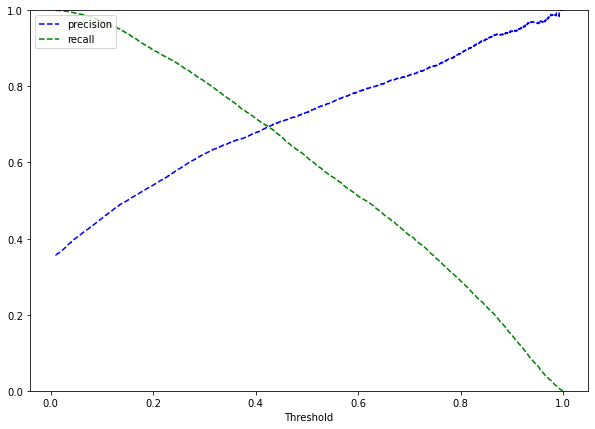

In [46]:
y_scores = lg2.predict(x_train)

precisions, recalls, thresholds = metrics.precision_recall_curve(y_train, y_scores)

#Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
plt.plot(thresholds, recalls[:-1], 'g--', label='recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

* At 0.42 threshold we get a balanced precision and recall.

## Decision Tree
### Building Decision Tree Model, Checking performance and finding feature importance

In [48]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19702
           1       1.00      0.99      1.00     10101

    accuracy                           1.00     29803
   macro avg       1.00      1.00      1.00     29803
weighted avg       1.00      1.00      1.00     29803



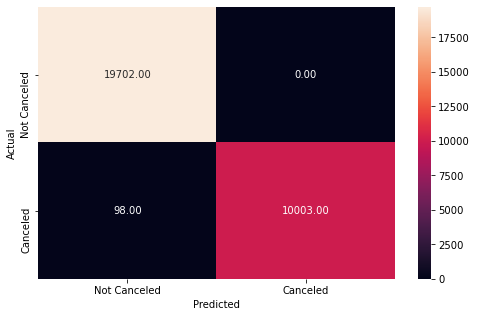

In [49]:
yhat_train = dt.predict(x_train)
classification_report(y_train, yhat_train)

#### Checking model performance on test set

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      8387
           1       0.69      0.70      0.70      4386

    accuracy                           0.79     12773
   macro avg       0.77      0.77      0.77     12773
weighted avg       0.79      0.79      0.79     12773



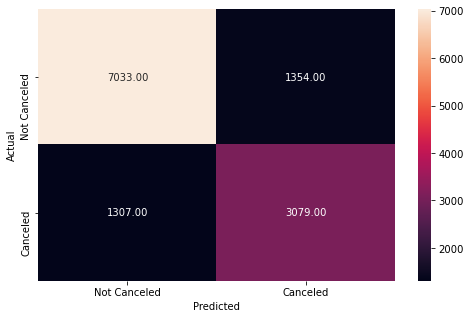

In [50]:
yhat = dt.predict(x_test)
classification_report(y_test, yhat)

### Check the feature importance for the decision tree model

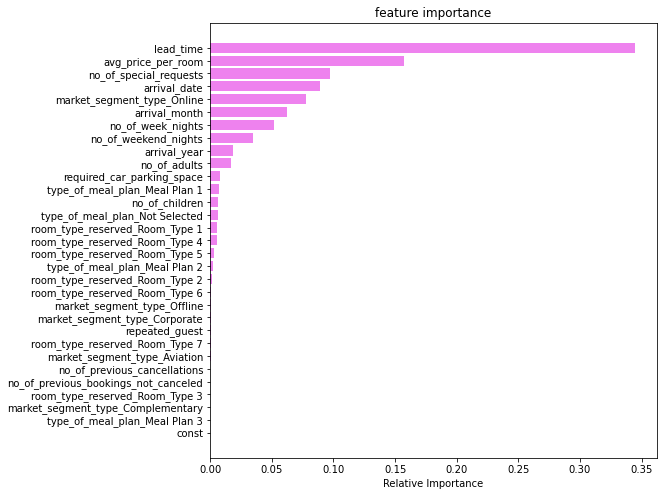

In [61]:
feature_names = x.columns
importances = dt.feature_importances_
indicies = np.argsort(importances)

plt.figure(figsize=(8,8))
plt.title('feature importance')
plt.barh(range(len(indicies)), importances[indicies], color='violet', align='center')
plt.yticks(range(len(indicies)), [feature_names[i] for i in indicies])
plt.xlabel("Relative Importance")
plt.show()

### Building SVM and checking its performance

In [69]:
from sklearn.svm import SVC
svm = SVC(kernel='linear') # linear kernal or linear decision boundary
svm.fit(x_train, y_train)

SVC(kernel='linear')

              precision    recall  f1-score   support

           0       0.82      0.88      0.85     19702
           1       0.72      0.63      0.67     10101

    accuracy                           0.79     29803
   macro avg       0.77      0.75      0.76     29803
weighted avg       0.79      0.79      0.79     29803



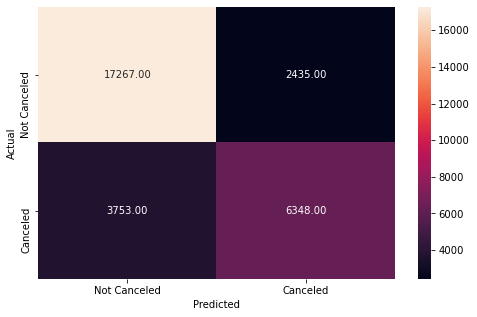

In [71]:
yhat_train = svm.predict(x_train)
classification_report(y_train, yhat_train)

              precision    recall  f1-score   support

           0       0.82      0.87      0.84      8387
           1       0.72      0.63      0.67      4386

    accuracy                           0.79     12773
   macro avg       0.77      0.75      0.76     12773
weighted avg       0.78      0.79      0.79     12773



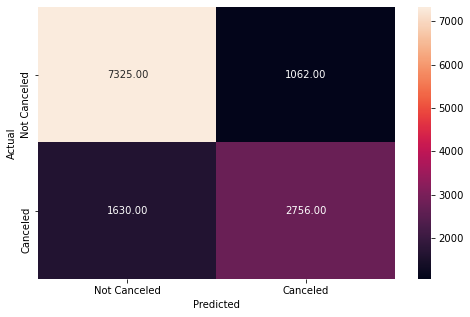

In [72]:
yhat = svm.predict(x_test)
classification_report(y_test, yhat)

* SVM model with default kernel  linear is not overfitting as the accuracy is around 80% for both train and test dataset
* Recall for the model only around 60% which implies this model  not always correctly predict the bookings which could be cancelled by the customer. But
* The precision score is good and so the model identifies most of the cases correctly where booking will not be cancelled.

### Business Recommendations

1. The lead time and the number of special requests made by the customer play a key role in identifying if a booking will be cancelled or not. Bookings where a customer has made a special request and the booking was done under 150 days to the date of arrival are less likely to be canceled.

    * Using this information, the hotel can take the following actions:
        * Set up a system that can send a prompt like an automated email to the customers before the arrival date asking for a  re-confirmation of their booking and any changes they would like to make in their bookings.
        * Remind guests about imminent deadlines.
 
The response given by the customer will give the hotel ample time to re-sell the room or make preparations for the customers' requests.


2. Stricter cancellation policies can be adopted by the hotel. 
    * The bookings where the average price per room is high, and there were special requests associated should not get a full refund as the loss of resources will be high in these cases.
    * Ideally the cancellation policies should be consistent across all market segments but as noticed in our analysis high percentage of bookings done online are cancelled. The booking cancelled online should yield less percentage of refund to the customers.
    
The refunds, cancellation fee, etc should be highlighted on the website/app before a customer confirms their booking to safeguard guests' interest.

3. The length of stay at the hotel can be restricted.
    * We saw in our analysis that bookings, where the total length of stay was more than 5 days, had higher chances of getting cancelled.
    * Hotel can allow bookings up to 5 days only and then customers should be asked to re-book if they wish to stay longer. These policies can be relaxed for corporate and Aviation market segments. For other market segments, the process should be fairly easy to not hamper their experience with the hotel.

Such restrictions can be strategized by the hotel to generate additional revenue.


4. In the months November, December, and January cancellation to non-cancellation ratio is low. Customers might travel to celebrate Christmas and New Year. The hotel should ensure that enough human resources are available to cater to the needs of the guests.


5. July and August saw the highest number of bookings but also the highest number of cancellations. This should be investigated further by the hotel. 


6. Post-booking interactions can be initiated with the customers.

    * Post-booking interactions will show the guests the level of attention and care they would receive at the hotel. 
    * To give guests a personalized experience, information about local events, nearby places to explore, etc can be shared from time to time.


7. Improving the experience of repeated customers.

    * Our analysis shows that there are very few repeated customers and the cancellation among them is very less which is a good indication as repeat customers are important for the hospitality industry as they can help in spreading the word of mouth.
    * A loyal guest is usually more profitable for the business because they are more familiar with offerings from the hotel they have visited before.
    * Attracting new customers is tedious and costs more as compared to a repeated guest.
    * A loyalty program that offers - special discounts, access to services in hotels, etc for these customers can help in improving their experience.